# Data Madness
## The effect of VAR on the 2019-20 Premier League Season

Video Assisted Referee (VAR) was introduced in the Premier League for the 2019-20 season and brought with it its load of controversies. The aim of this project is to analyse the impact of VAR on its introduction season. The research questions are the following:

1. For what type of incidents is VAR most used?

2. Is there a gap between the number of overturned decisions for and against each team? 

3. Is the number of disallowed goals significant? Would the season have been different if these goals were not disallowed?

To answer them, two datasets are used: VAR_Incidents_Stats, that describes the types of incidents the VAR was used for, and VAR_Team_Stats, that describes the number of overturned decisions per team and how did these decisions affect the game.
For information, this is the final Premier League Table.

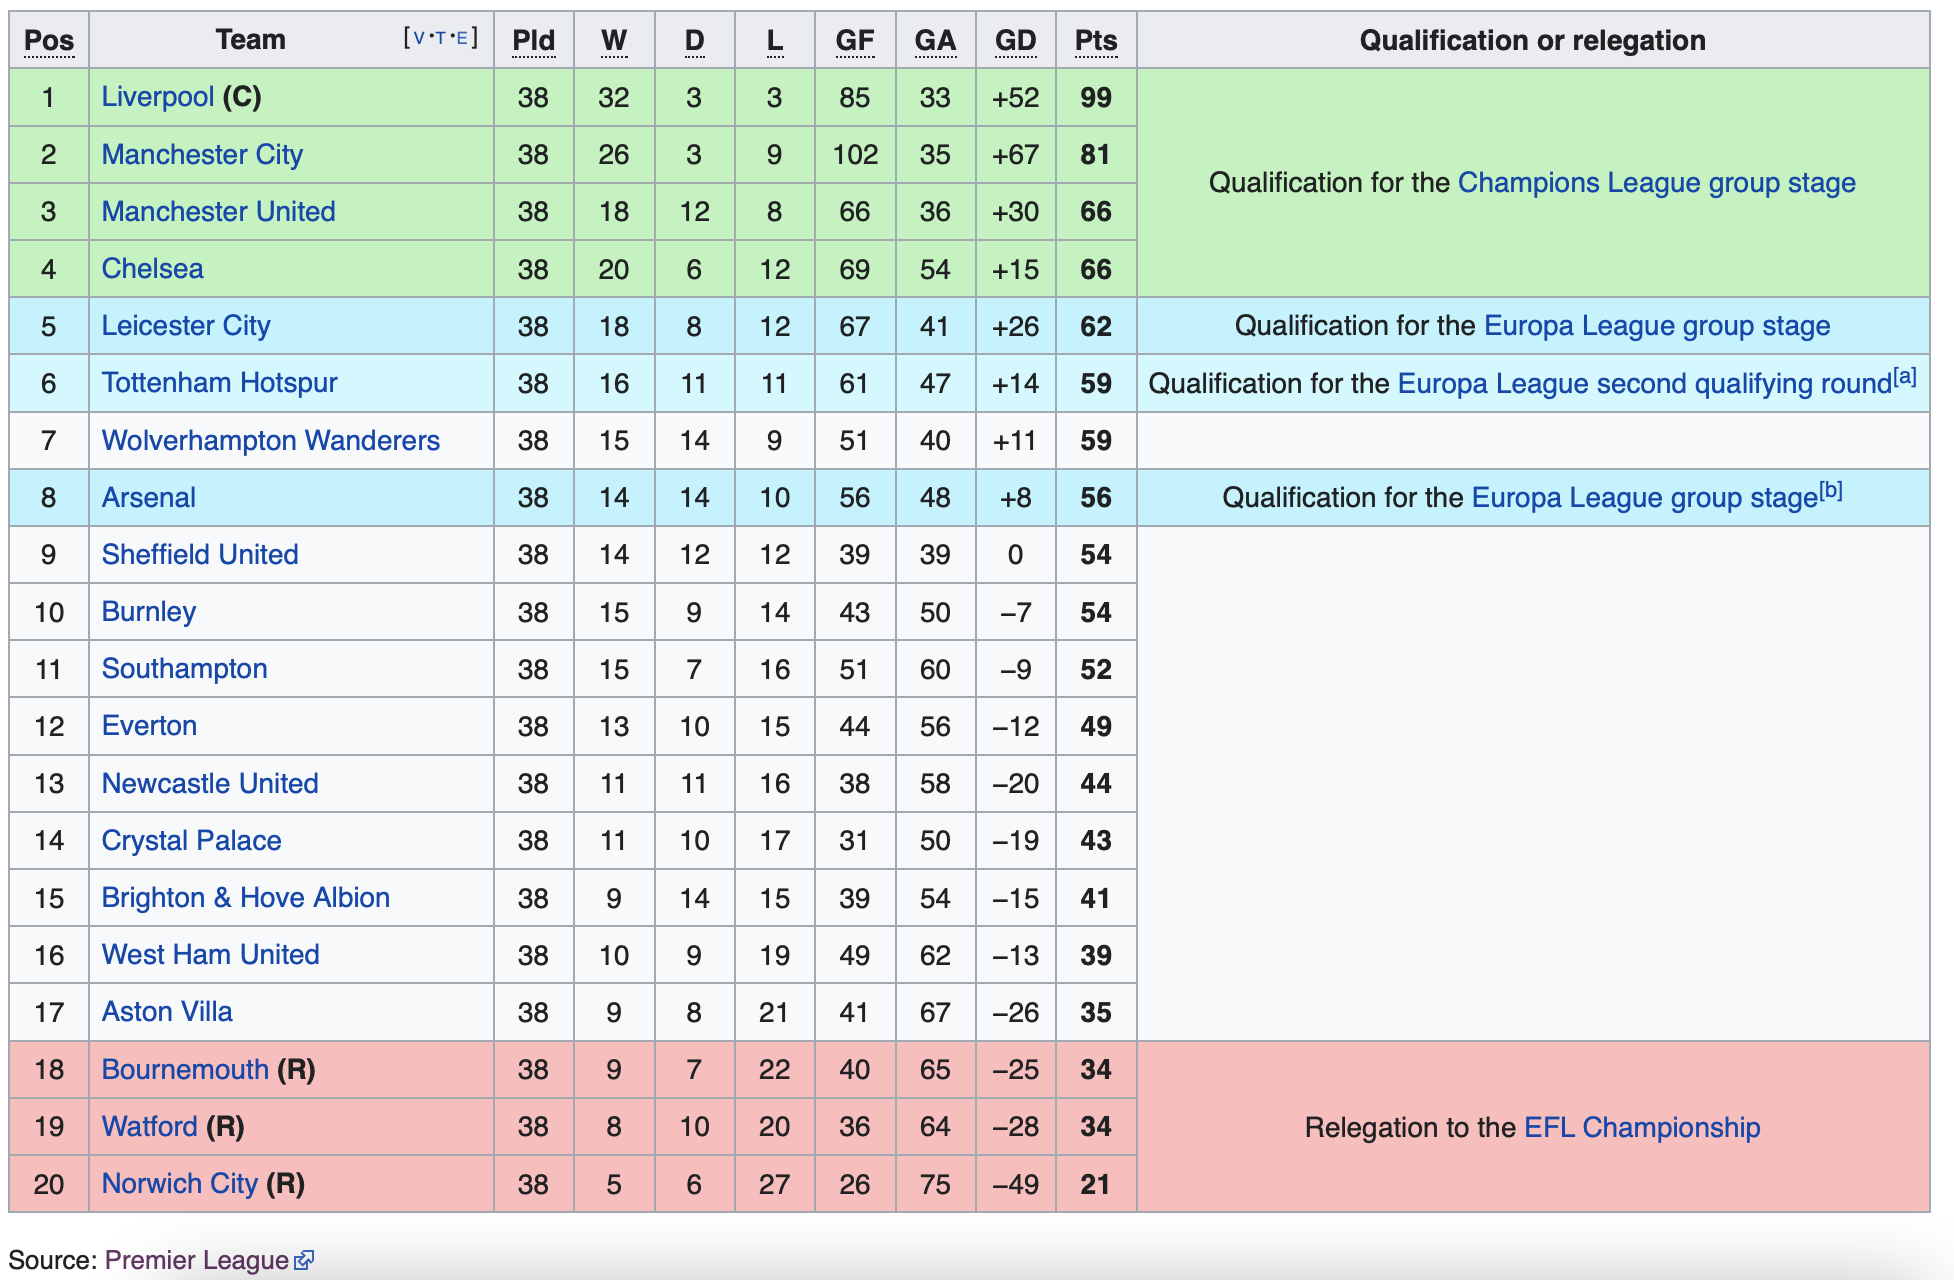

In [35]:
from IPython import display 
display.Image("Table.png")

The season's winner was Liverpool, followed by Manchester City, Manchester United and Chelsea, who were all qualified for the 2020-2021 Champions League. Leicester and Tottenham were qualified for the Europa League thanks to their rankings, while Arsenal was qualified for the competition after winning the 2019-20 FA Cup. Therefore, Arsenal's final ranking did not affect their Europa League Qualification. Finally, Bournemouth, Watford and Norwich City were relegated to the EFL Championship.

Let's start this analysis by loading the datasets.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
incidents = pd.read_csv ('VAR_Incidents_Stats.csv')
print (incidents)

                       Team   Opponent Team     Date Site  \
0    Brighton & Hove Albion        West Ham  Aug. 17    H   
1    Brighton & Hove Albion     Aston Villa  Oct. 19    A   
2    Brighton & Hove Albion         Everton  Oct. 26    H   
3    Brighton & Hove Albion       Leicester  Nov. 23    H   
4    Brighton & Hove Albion        Arsenal    Dec. 5    A   
..                      ...             ...      ...  ...   
213            Norwich City  Crystal Palace   Jan. 1    H   
214            Norwich City     Bournemouth  Jan. 18    H   
215            Norwich City       Leicester  Feb. 28    H   
216            Norwich City         Burnley  July 18    H   
217            Norwich City        Man City  July 26    A   

                                              Incident         Time VAR used  
0    Brighton goal for Leandro Trossard ruled out f...  27th minute  AGAINST  
1    Conor Hourihane goal ruled out for a foul by W...  42nd minute      FOR  
2    Penalty awarded (scored b

In [17]:
teams = pd.read_csv ('VAR_Team_Stats.csv')
print (teams)

                      Team  Overturns  Leading to goals for  \
0   Brighton & Hove Albion         12                     2   
1        Manchester United         13                     1   
2           Crystal Palace         12                     3   
3                  Burnley         11                     2   
4                Newcastle          3                     1   
5              Southampton         13                     0   
6                Liverpool          8                     1   
7           Leicester City         15                     1   
8        Tottenham Hotspur         15                     1   
9          Manchester City         16                     3   
10                 Arsenal          9                     4   
11                 Everton          7                     2   
12         AFC Bournemouth         12                     2   
13                 Chelsea         12                     2   
14                 Watford          6                  

# 1. For what type of incidents is VAR most used?
This question will be answered using the first dataset (i.e. VAR_Incidents_Stats). The dataset will first be cleaned in order to keep only the relevant information. Afterwards, a string search in the "Incident" column will be executed, followed by a frequency analysis to determine the frequency of each incident type.

The first step is to delete every column except the relevant one.

In [13]:
#Keep only the "Incident" column

incidents_cleaned = incidents ['Incident']
incidents_cleaned

0      Brighton goal for Leandro Trossard ruled out f...
1      Conor Hourihane goal ruled out for a foul by W...
2      Penalty awarded (scored by Neil Maupay) for fo...
3      Jamie Vardy penalty retaken after James Maddis...
4                 David Luiz goal disallowed for offside
                             ...                        
213    Connor Wickham goal awarded after originally b...
214    Red card for Ben Godfrey for foul on Callum Wi...
215    Goal for Kelechi Iheanacho disallowed for hand...
216    Red card for Emiliano Buendia for an elbow on ...
217        Goal for Onel Hernandez ruled out for offside
Name: Incident, Length: 218, dtype: object

A string search will now be executed to determine the most frequent types of incidents reviewed by the VAR. The incidents are separated in 7 different categories:
1. A goal ruled out for offside
2. A goal ruled out for a foul (by the attacking team)
3. A goal ruled out for a handball (by the attacking team)
4. A penalty that needs to be retaken
5. A goal allowed after being disallowed by the referees
6. A penalty awarded
7. A penalty cancelled 

# 2. Is there a gap between the number of overturned decisions for and against each team? 

This second question will be answered using the "VAR_Teams_Stats" dataset. After cleaning it, the number of overturned decisions for and against each team will be analysed and presented in a suitable manner. 
Let's first display a table where the teams will be sorted by the number of overturned decisions in their games, in descending order.

In [30]:
sorted_teams = teams.sort_values("Overturns",ascending=False)
sorted_teams

Team  Overturns  Leading to goals for  \
16                West Ham         16                     1   
9          Manchester City         16                     3   
7           Leicester City         15                     1   
8        Tottenham Hotspur         15                     1   
5              Southampton         13                     0   
1        Manchester United         13                     1   
0   Brighton & Hove Albion         12                     2   
12         AFC Bournemouth         12                     2   
2           Crystal Palace         12                     3   
13                 Chelsea         12                     2   
17        Sheffield United         11                     0   
19            Norwich City         11                     0   
3                  Burnley         11                     2   
18                  Wolves          9                     1   
10                 Arsenal          9                     4   
6                Liverpool          8                     1   
11                 Everton          7                     2   
15             Aston Villa          7                     0   
14                 Watford          6                     1   
4                Newcastle          3                     1   

    Disallowed goals for  Leading to goals against  Disallowed goals against  \
16                     5                         5                         4   
9                      4                         2                         2   
7                      3                         1                         4   
8                      4                         1                         6   
5                      0                         1                         7   
1                      0                         2                         7   
0                      2                         0                         7   
12                     5                         1                         1   
2                      4                         0                         1   
13                     4                         2                         2   
17                     5                         1                         2   
19                     2                         2                         2   
3                      3                         1                         4   
18                     4                         1                         1   
10                     2                         1                         0   
6                      3                         0                         4   
11                     2                         1                         1   
15                     3                         1                         1   
14                     1                         2                         1   
4                      0                         0                         0   

    Net goal score  Subjective decisions for  Subjective decisions against  \
16              -5                         2                             1   
9               -1                         4                             4   
7                1                         3                             3   
8                2                         3                             3   
5                6                         1                             4   
1                6                         6                             2   
0                7                         2                             0   
12              -3                         2                             4   
2                2                         6                             2   
13              -2                         4                             4   
17              -4                         1                             2   
19              -4                         1                             5   
3  

In [32]:
sorted_teams['Overturns'].describe()

count    20.00000
mean     10.90000
std       3.49285
min       3.00000
25%       8.75000
50%      11.50000
75%      13.00000
max      16.00000
Name: Overturns, dtype: float64

We can see that the teams that had the most decisions overturned by VAR are West Ham and Manchester City, with 16 overturned decisions, so exactly one overturned decision every 2 games. On the other hand, the team with the least amount of overturned decisions is Newcastle, with only 3 referee decisions corrected by the VAR in the season. 
The average number of overturned decisions per game is 11. The median is really close (11.5) and the standard deviation is 3.5. 
The number of overturned decisions leading to goals for and against each team will now be analysed.

## 3. Is the number of disallowed goals significant? Would the season have been different if these goals were not disallowed?

This question will also be answered using the second dataset (i.e. VAR_Team_Stats). The aim is to analyse the number of goals that were disallowed by the VAR or attributed thanks to it. An alternative league table will then be calculated and compared with the final 2019-20 Premier League table.

In [11]:
#code etc